In [2]:
import pandas as pd
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.options.mode.chained_assignment = None
import numpy as np
import os

In [3]:
def weighted_median(df, val, weight):
    df_sorted = df.sort_values(val)
    cumsum = df_sorted[weight].cumsum()
    cutoff = df_sorted[weight].sum() / 2.
    return df_sorted[cumsum >= cutoff][val].iloc[0]


In [4]:
years = [55, 56, 57, 58, 59, 60, 61]
skill_list = ['Leadership', 'Health', 'Science', 'Service', 'Art', 'Unknown']

In [5]:
final_file_path = r'C:\Users\Obs\Desktop\Senior_Research\final_file'

### Normalize with median

In [ ]:
for year in years:
    lfs = pd.read_csv(os.path.join(final_file_path, 'lfs_normalize with min max', 'lfs_' + str(year) + '_final.csv'))
    for skill in skill_list:
        lfs[skill] = lfs[skill]/weighted_median(lfs, skill, 'Weight')
        
    lfs.to_csv(os.path.join(final_file_path, 'lfs_normalize with median', 'lfs_' + str(year) + '_final.csv'))

### Standardize

In [7]:
stat = pd.read_csv(os.path.join(final_file_path, 'stat', 'stat.csv'))
for year in years:
    lfs = pd.read_csv(os.path.join(final_file_path, 'lfs_normalize with min max', 'lfs_' + str(year) + '_final.csv'))
    for skill in skill_list:
        mean = stat.loc[(stat['year'] == year) & (stat['skill'] == skill), 'mean'].values[0]
        sd = stat.loc[(stat['year'] == year) & (stat['skill'] == skill), 'sd'].values[0]
        
        lfs[skill] = (lfs[skill] - mean)/sd
        
    lfs.to_csv(os.path.join(final_file_path, 'lfs_standardize', 'lfs_' + str(year) + '_final.csv'))

C:\Users\Obs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

In [23]:
wage = lfs.groupby(['OCCUP']).apply(wavg, 'APPROX', 'Weight').rename('wage').to_frame()

In [24]:
wage['Art'] = lfs.groupby(['OCCUP']).apply(wavg, 'Art', 'Weight').to_frame()

In [26]:
wage['weight'] = lfs.groupby(['OCCUP']).sum()['Weight']

In [27]:
wage

,wage,Art,weight
OCCUP,,,
1111,10728.228344,-0.307257,3.186272e+05
1112,58150.654892,-1.127610,3.096688e+04
1113,6536.658012,0.315285,5.988679e+05
1114,28986.575134,0.333831,1.632574e+04
1120,69070.627569,0.709729,9.619758e+04
1211,40018.835299,-0.132810,3.512123e+05
1212,42332.411330,0.300799,1.586443e+05
1213,48980.158637,-0.119714,1.010937e+05
1219,38804.349963,0.414654,1.150095e+05


In [28]:
import matplotlib.pyplot as plt

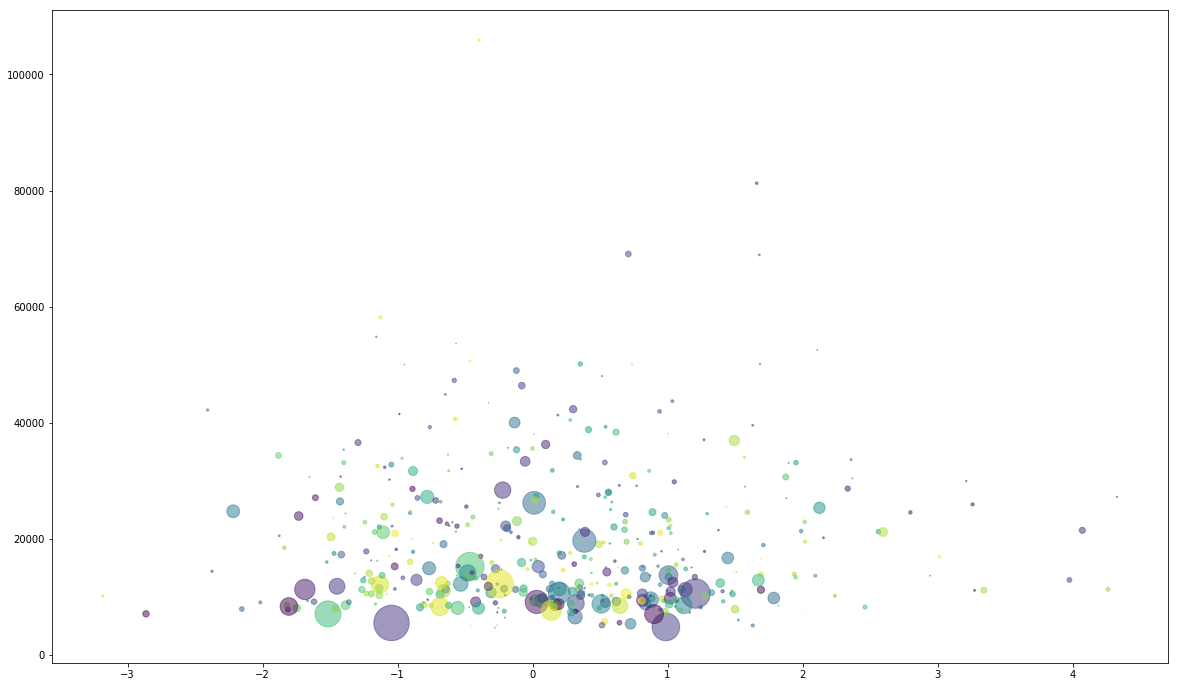

In [44]:
colors = np.random.rand(430)
plt.figure(figsize=(20,12))
plt.scatter(wage['Art'], wage['wage'], s=wage['weight']/3000, c=colors, alpha=0.5)
plt.show()

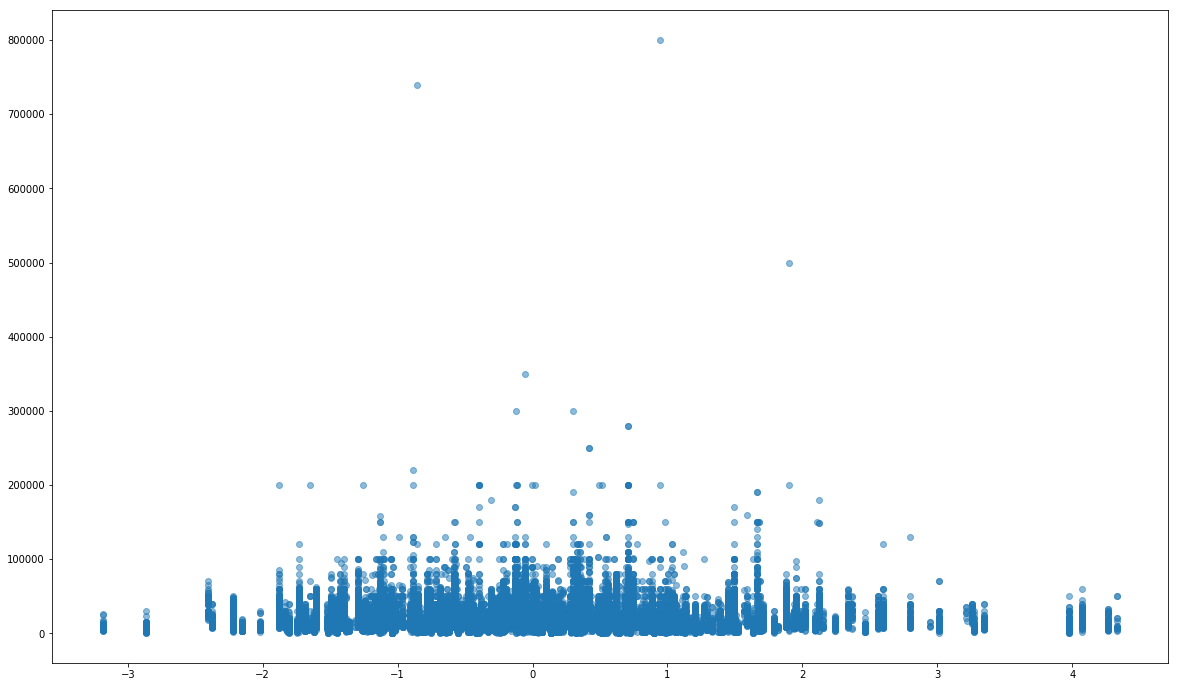

In [52]:
plt.figure(figsize=(20,12))
plt.scatter(lfs.dropna(subset = ['APPROX', 'Art'])['Art'], lfs.dropna(subset = ['APPROX', 'Art'])['APPROX'], alpha=0.5)
plt.show()